## Import Libraries and Data

In [108]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from summarytools import dfSummary
from scipy.stats import entropy


In [109]:
## Import Data

df_cars = pd.read_csv('/Users/samabrams/Data Analysis Projects/Car-Color-Trends-Project/02 Data/Prepared Data/df_cars_combined.csv')


## Overview of Data

In [110]:
## Summary of Data

dfSummary(df_cars)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,make[object],1. Ford2. Chevrolet3. Nissan4. Toyota5. Dodge6. Honda7. Hyundai8. BMW9. Kia10. Chrysler11. other,"83,767 (15.9%)59,469 (11.3%)50,710 (9.6%)39,076 (7.4%)30,164 (5.7%)26,939 (5.1%)21,515 (4.1%)20,384 (3.9%)17,867 (3.4%)16,977 (3.2%)160,333 (30.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEJUlEQVR4nO3dQW7bVgBFUaowgmYiwTDgxXgRXWwXod0YhjVogkzUQYeWLcr8vCnhcxYgeXDxBRL/Jbvz+TxB4Y/f/QfwdYiNjNjIiI2M2MiIjYzYyIiNjNjI7KZp+j5N07eVv+fX+Xz+sfJ38D939/Dw8Nd+v79f80tOp9PLbrf7W3Bf291+v79/enr6cTgcfq7xBa+vr38ej8f75+fnb9M0ie0Lu5umaTocDj8fHx//WfF7vq/42WyEBwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNzN03/3Tlb6wvW/Gy25e50Or0cj8f7acU7Z6fT6WWapl9rfT7bYINAZuefzKIy6mRzcnHVkHWV9RRzLF5XWU8x16h1lfUUV3mpS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERmbx4MWghbmGDF4MWpjDtXAyBi9klp5sTjRmWzR4MXThFp8evBi6cKulgxdDF2bzUpeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3Mpwcvhi7catHgxdCFW7gWTsbghYwHBDK3/oz62eTTblpXWVOxxOx1lTUVS926rrKm4tM8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGZva6ypmKpm9ZV1lQs4Vo4GesqMnNPNicai80avBi6MMLVwYuhC6PMHbwYurCYl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkrg5eDF0YZdbgxdCFEVwLJ2PwQmbOyeZUY4irgxdjF0b5cPBi7MJIcwYvxi4M4aUuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGR+XBdZVnFSFfXVZZVjGKDQMa6isxHJ5sTjaHeXVdZVTHaxXWVVRVr+GhdZVXFUF7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbk4eDF0YQ3vDl4MXRjNtXAyBi9knGxkDF7IGLyQMXgh46UuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZFwLJ2PwQsYDApn3fkb9hDLcxXWVZRVreLOusqxiLe+tqyyrGM4DAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5k36yrLKtZycV1lWcUaXAsnY11FxslGxuCFjMELGYMXMl7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsa1cDIGL2Q++o/StsAJvCEXBy9bYZizLW8GL1thmLM97w1etsIwZ0O81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiPzZvCyFVv8m7+6i4OXrTDM2RbXwskYvJDxgEBGbGTERkZsZMRGRmxkxEZGbGTERuZfPL1O4j5k4n8AAAAASUVORK5CYII="">",0(0.0%)
2,model[object],1. Altima2. F-1503. Camry4. Fusion5. Escape6. Focus7. Accord8. 3 Series9. Impala10. Grand Caravan11. other,"18,085 (3.4%)13,327 (2.5%)12,148 (2.3%)10,948 (2.1%)10,407 (2.0%)9,268 (1.8%)9,039 (1.7%)8,012 (1.5%)7,832 (1.5%)7,641 (1.4%)420,494 (79.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEHklEQVR4nO3dQU7baACG4T8oYppNogiJY/QAOUQPO4fwAbgHQnjRMN0wi7Yo0C7xawmeZ9XJJpbmlSNb/9dunp+fBxSu1r4APg+xkREbGbGRERsZsZERGxmxkREbmc0YYzfGuH7z+Y/n5+fzCtfDB7a9ubn5tt/vj5cfzvP8sNls/hUc72m73++Pp9PpfDgcnsYY4/Hx8cs0Tcf7+/vrMYbYeDfbMcY4HA5Pt7e33y8+3610PXxgHhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MdoyfZ9h+f3D5Z3hP23meH6ZpOo6LM2zzPD+MMX6sd1l8RDYIZDb+yiwqf7uzuauxiD/WVZZVLOXVusqyiiX9bV1lWcUivNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIj82rwYuzCkv4YvBi7sBTHwskYvJBxZyNj8ELG4IWMwQsZL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41g4GYMXMh4QyLz9GfUTymJerassq1jS1e911el0Ov+K7u0/Bwnv4mVd9eu/LatYjAcEMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2Mq/WVbCky3WVZRWLciycjHUVGXc2MgYvZAxeyBi8kPFSl4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzBCxmDFzKOhZMxeCHjzkbG4IWMwQsZgxcyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVkbBDIWFeRcWcjY11FxrqKjHUVGS91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyBi8kDF4IeNYOBmDFzKXdzZ3NRb1MngxdmFpV/v9/vj169dh7MLSrsYYY7fb/bf2hfDxealLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mqMMc7n8z9rXwgf39U8zw93d3fGLizOsXAyBi9kPCCQ8TNKxrqKjHUVGesqMh4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyFhXkbGuIuNYOBnrKjLubGQMXsgYvJAxeCHjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BC5vLOxuew2i/Yy+BljS+nt+awabvf74+n0+l8OBye6i+n9fj4+GWapuP9/f31GKOPbYwxDofD0+3t7ff6y1nFbq0v9lKXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHaMn0dP1r4Qlrf2/+ftPM8P0zQdx4pHT+isOWxyLPzzWe1YuMELGQ8IZMRGRmxkxEZGbGTERkZsZMRGRmxk/gefH/AGkg4c9gAAAABJRU5ErkJggg=="">",0(0.0%)
3,year[int64],Mean (sd) : 2010.1 (4.0)min < med < max:1974.0 < 2012.0 < 2024.0IQR (CV) : 6.0 (

In [111]:
df_cars.head(20)


,make,model,year,odometer,fuel_type,transmission,color,interior,sellingprice,vin,state,body,source
0,Maserati,Ghibli S Q4,2016,1000.0,Gasoline,Automatic,Gray,Red,36000,Unknown,Unknown,Unknown,cars.com
1,Aston,Martin Vantage Base,2022,1023.0,Gasoline,Automatic,Blue,Brown,156900,Unknown,Unknown,Unknown,cars.com
2,Mercedes-Benz,Metris Base,2020,1025.0,Gasoline,Automatic,Black,Beige,299000,Unknown,Unknown,Unknown,cars.com
3,Toyota,Sequoia Platinum,2023,1025.0,Hybrid,Automatic,Black,Black,85000,Unknown,Unknown,Unknown,cars.com
4,Toyota,GR86 Premium,2022,1050.0,Gasoline,Automatic,Gray,Black,40000,Unknown,Unknown,Unknown,cars.com
5,Volkswagen,Golf R Base,2022,1067.0,Gasoline,Automatic,White,Blue,48000,Unknown,Unknown,Unknown,cars.com
6,Toyota,GR86 Premium,2023,1075.0,Gasoline,Manual,White,Black,35000,Unknown,Unknown,Unknown,cars.com
7,Maserati,MC20 Base,2022,1087.0,Gasoline,Automatic,Matte White,Black,279000,Unknown,Unknown,Unknown,cars.com
8,Cadillac,LYRIQ Luxury,2023,1090.0,Unknown,Automatic,Gray,Silver,68750,Unknown,Unknown,Unknown,cars.com
9,Nissan,Rogue SV,2023,1094.0,Gasoline,Automatic,Caspian Blue,Light Gray,30999,Unknown,Unknown,Unknown,cars.com


In [112]:
df_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527201 entries, 0 to 527200
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   make          527201 non-null  object 
 1   model         527201 non-null  object 
 2   year          527201 non-null  int64  
 3   odometer      527201 non-null  float64
 4   fuel_type     527201 non-null  object 
 5   transmission  527201 non-null  object 
 6   color         527201 non-null  object 
 7   interior      527201 non-null  object 
 8   sellingprice  527201 non-null  int64  
 9   vin           527201 non-null  object 
 10  state         527201 non-null  object 
 11  body          527201 non-null  object 
 12  source        527201 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 52.3+ MB


In [113]:
df_cars.describe()


,year,odometer,sellingprice
count,527201.000000,527201.000000,5.272010e+05
mean,2010.061398,68649.976842,1.371617e+04
std,3.991105,53278.409044,1.200675e+04
min,1974.000000,1.000000,1.000000e+00
25%,2007.000000,28760.000000,6.800000e+03
50%,2012.000000,52860.000000,1.210000e+04
75%,2013.000000,99497.000000,1.820000e+04
max,2024.000000,999999.000000,2.954083e+06


In [114]:
df_cars.shape


(527201, 13)

In [ ]:
## I realized that I forgot to merge Dodge and Ram (Ram and Dodge split in 2010 as two separate entities), so I'm going to do that now.

df_cars['make'] = df_cars['make'].replace({
    'RAM': 'Dodge',
    'ram': 'Dodge', 
    'dodge tk': 'Dodge',
    'Ram': 'Dodge'  # just in case
})


In [ ]:
## Check that it worked

pd.set_option('display.max_rows', None)
df_cars['make'].value_counts()


make
Ford             83767
Chevrolet        59469
Nissan           50710
Toyota           39076
Dodge            34751
Honda            26939
Hyundai          21515
BMW              20384
Kia              17867
Chrysler         16977
Mercedes-Benz    15583
Jeep             15215
Infiniti         14395
Lexus            11606
Volkswagen       11484
GMC              10569
Mazda             8301
Cadillac          7531
Acura             5887
Audi              5766
Buick             5059
Subaru            4996
Lincoln           4926
Pontiac           4462
Mitsubishi        4061
Volvo             3734
MINI              3188
Saturn            2827
Mercury           1952
Land Rover        1708
Scion             1648
Porsche           1570
Jaguar            1443
Suzuki            1068
FIAT               851
HUMMER             792
Saab               480
ford               438
smart              387
chevrolet          385
Oldsmobile         363
dodge              244
chrysler           209
Isuzu 

## 3. EDA - Color Evolution over Time

In [117]:
## First, value_counts of the 'color' column to see the distribution of car colors

pd.set_option('display.max_rows', None)  # Show all rows in the output
df_cars['color'].value_counts()


color
gray                                       163706
black                                      109581
white                                      105692
red                                         51559
blue                                        50055
gold                                        10994
green                                       10962
beige                                        8986
brown                                        6637
orange                                       2007
purple                                       1526
yellow                                       1235
Black                                         905
White                                         816
Gray                                          496
Silver                                        374
Blue                                          349
Red                                           261
turquoise                                     225
Green                                       

In [118]:
## The color choices are a hot mess. I need to consolidate these before moving on.

## First, I'm going to set them all to lowercase to standardize the case.
df_cars['color'] = df_cars['color'].str.lower()


In [119]:
## Making sure that worked...

df_cars['color'].value_counts()


color
gray                                       164202
black                                      110489
white                                      106508
red                                         51820
blue                                        50405
green                                       11036
gold                                        11036
beige                                        9024
brown                                        6680
orange                                       2043
purple                                       1538
yellow                                       1264
silver                                        374
turquoise                                     225
pink                                           43
bright white clearcoat                         14
summit white                                   14
diamond black                                  14
alpine white                                    8
granite crystal clearcoat metallic          

In [120]:
## Cool. Next comes the fun part: consolidating similar colors into broader categories.

color_mapping = {
    # Standard colors (keep as-is)
    'gray': 'gray',
    'black': 'black', 
    'white': 'white',
    'red': 'red',
    'blue': 'blue',
    'gold': 'gold',
    'green': 'green',
    'beige': 'beige',
    'brown': 'brown',
    'orange': 'orange',
    'purple': 'purple',
    'yellow': 'yellow',

# BLACK variations
    'diamond black': 'black',
    'midnight black metallic': 'black',
    'midnight black': 'black',
    'agate black metallic': 'black',
    'black clearcoat': 'black',
    'ebony twilight metallic': 'black',
    'mythos black metallic': 'black',
    'mythos black': 'black',
    'black sapphire metallic': 'black',
    'mosaic black metallic': 'black',
    'deep black pearl effect': 'black',
    'obsidian black metallic': 'black',
    'santorini black metallic': 'black',
    'majestic black pearl': 'black',
    'jet black mica': 'black',
    'onyx black': 'black',
    'ebony black': 'black',
    'beluga black': 'black',
    'black raven': 'black',
    'magnetic black': 'black',
    'santorin black': 'black',
    'caviar': 'black',
    'dark matter metallic': 'black',
    'db black clearcoat': 'black',
    'crystal black silica': 'black',
    'black obsidian': 'black',
    'nero noctis': 'black',
    'santorini black': 'black',
    'black noir pearl': 'black',
    'vik black': 'black',
    'nero daytona': 'black',
    'phantom black': 'black',
    'onyx': 'black',
    'ultra black': 'black',
    'stellar black metallic': 'black',
    'magnetite black metallic': 'black',
    'aurora black': 'black',
    'crystal black pearl': 'black',
    'super black': 'black',
    'carbon black metallic': 'black',
    'phantom black pearl effect / black roof': 'black',
    'twilight black': 'black',
    'obsidian': 'black',
    'crystal black': 'black',
    'shadow black': 'black',
    'vulcano black metallic': 'black',
    'orca black metallic': 'black',

# WHITE variations
    'bright white clearcoat': 'white',
    'summit white': 'white',
    'alpine white': 'white',
    'oxford white': 'white',
    'glacial white pearl': 'white',
    'fuji white': 'white',
    'snow white pearl': 'white',
    'snowflake white pearl': 'white',
    'platinum white pearl': 'white',
    'eminent white pearl': 'white',
    'wind chill pearl': 'white',
    'glacier white': 'white',
    'white knuckle clearcoat': 'white',
    'white frost tri-coat': 'white',
    'arctic white': 'white',
    'white diamond tri-coat': 'white',
    'white clearcoat': 'white',
    'diamond white': 'white',
    'super white': 'white',
    'manufaktur diamond white bright': 'white',
    'alta white': 'white',
    'crystal white pearl': 'white',
    'matte white': 'white',
    'balloon white': 'white',
    'dazzling white': 'white',
    'star white': 'white',
    'carrara white metallic': 'white',
    'yulong white': 'white',
    'frozen white': 'white',
    'pristine white': 'white',
    'emin white': 'white',
    'pearl white': 'white',
    'brilliant white': 'white',
    'oryx white prl': 'white',
    'lunare white metallic': 'white',
    'snowflake white pearl metallic': 'white',
    'bianco isis': 'white',
    'glacier': 'white',
    'moonlight cloud': 'white',
    'pure white': 'white',
    'quartz white': 'white',
    'mineral white': 'white',
    'bianco monocerus': 'white',
    'designo diamond white metallic': 'white',
    'designo diamond white': 'white',
    'designo diamond white bright': 'white',
    'alfa white': 'white',
    'ibis white': 'white',
    'yulong': 'white',
    'bianco icarus metallic': 'white',
    'ice': 'white',

# GRAY/SILVER variations (all map to gray)
    'silver': 'gray',
    'silver ice metallic': 'gray',
    'atomic silver': 'gray',
    'satin steel metallic': 'gray',
    'daytona gray pearl effect': 'gray',
    'daytona gray': 'gray',
    'shadow gray metallic': 'gray',
    'lunar silver metallic': 'gray',
    'billet silver metallic clearcoat': 'gray',
    'brilliant silver metallic': 'gray',
    'eiger grey': 'gray',
    'gun metallic': 'gray',
    'manhattan noir metallic': 'gray',
    'nebula gray pearl': 'gray',
    'polymetal gray metallic': 'gray',
    'silver zynith': 'gray',
    'machine gray metallic': 'gray',
    'sonic silver metallic': 'gray',
    'tungsten metallic': 'gray',
    'sting gray clearcoat': 'gray',
    'chalk': 'gray',
    'titanium silver': 'gray',
    'chronos gray': 'gray',
    'indus silver': 'gray',
    'dark ash metallic': 'gray',
    'silky silver': 'gray',
    'gt silver': 'gray',
    'donington grey metallic': 'gray',
    'magnetic gray clearcoat': 'gray',
    'platinum gray metallic': 'gray',
    'ironman silver': 'gray',
    'stone gray metallic': 'gray',
    'dark gray metallic': 'gray',
    'wolf gray': 'gray',
    'quartzite grey metallic': 'gray',
    'volcano grey metallic': 'gray',
    'magnetite gray metallic': 'gray',
    'nightfall gray metallic': 'gray',
    'ice silver metallic': 'gray',
    'carpathian grey premium metallic': 'gray',
    'carbonized gray metallic': 'gray',
    'kemora gray metallic': 'gray',
    'sparkling silver': 'gray',
    'glacier white metallic': 'gray',
    'chronos gray metallic': 'gray',
    'graphite grey metallic': 'gray',
    'carpathian grey': 'gray',
    'cirrus silver metallic': 'gray',
    'silver flare metallic': 'gray',
    'glacier silver metallic': 'gray',
    'typhoon gray metallic': 'gray',
    'sandstone metallic': 'gray',
    'selenite gray metallic': 'gray',
    'shimmering silver': 'gray',
    'silver mist': 'gray',
    'graphite grey': 'gray',
    'midnight silver metallic': 'gray',
    'hampton gray': 'gray',
    'dark graphite metallic': 'gray',
    'frozen dark silver metallic': 'gray',
    'reflex silver': 'gray',
    'iridium silver metallic': 'gray',
    'silver radiance': 'gray',
    'baltic gray': 'gray',
    'granite crystal clearcoat metallic': 'gray',
    'granite': 'gray',
    'thunder gray': 'gray',
    'portofino gray': 'gray',
    'selenite grey metallic': 'gray',
    'typhoon gray': 'gray',
    'brands hatch gray metallic': 'gray',
    'white platinum tri-coat metallic': 'gray',
    'granite crystal metallic clearcoat': 'gray',
    'lunar rock': 'gray',
    'magnetic metallic': 'gray',
    'metallic': 'gray',
    'eiger grey metallic': 'gray',
    'rift metallic': 'gray',
    'iridium metallic': 'gray',
    'maximum steel metallic': 'gray',
    'dark slate metallic': 'gray',
    'magnetic gray metallic': 'gray',
    'iconic silver metallic': 'gray',
    'platinum quartz metallic': 'gray',
    'ingot silver metallic': 'gray',
    'quicksilver metallic': 'gray',
    'billet clearcoat metallic': 'gray',
    'liquid platinum': 'gray',
    'daytona gray pearl effect w/ black roof': 'gray',


# BLUE variations
    'blu': 'blue',
    'pacific blue metallic': 'blue',
    'phytonic blue metallic': 'blue',
    'patriot blue pearlcoat': 'blue',
    'lunar blue metallic': 'blue',
    'antimatter blue metallic': 'blue',
    'imperial blue metallic': 'blue',
    'dark moon blue metallic': 'blue',
    'deep blue metallic': 'blue',
    'horizon blue': 'blue',
    'anthracite blue metallic': 'blue',
    'quartz blue pearl': 'blue',
    'vega blue': 'blue',
    'nautical blue pearl': 'blue',
    'navarre blue': 'blue',
    'caspian blue': 'blue',
    'blue metallic': 'blue',
    'china blue': 'blue',
    'anodized blue metallic': 'blue',
    'bayside blue': 'blue',
    'blue caelum': 'blue',
    'navarra blue': 'blue',
    'twilight blue metallic': 'blue',
    'fountain blue': 'blue',
    'blueprint': 'blue',
    'electric blue metallic': 'blue',
    'navarra blue metallic': 'blue',
    'blue reflex mica': 'blue',
    'apex blue': 'blue',
    'northsky blue metallic': 'blue',
    'portofino blue metallic': 'blue',
    'shoreline blue pearl': 'blue',
    'kinetic blue': 'blue',
    'pacific blue': 'blue',
    'dark sapphire': 'blue',
    'gentian blue metallic': 'blue',
    'stormy sea': 'blue',
    'hydro blue pearlcoat': 'blue',
    'glacier blue metallic': 'blue',
    'midnight blue metallic': 'blue',
    'deep crystal blue mica': 'blue',
    'blu eleos': 'blue',
    'mountain air metallic': 'blue',
    
    # RED variations
    'soul red crystal metallic': 'red',
    'velvet red pearlcoat': 'red',
    'firecracker red clearcoat': 'red',
    'delmonico red pearlcoat': 'red',
    'flame red clearcoat': 'red',
    'cajun red tintcoat': 'red',
    'rosso mars metallic': 'red',
    'hyper red': 'red',
    'rapid red metallic tinted clearcoat': 'red',
    'tango red metallic': 'red',
    'firenze red': 'red',
    'ruby red metallic tinted clearcoat': 'red',
    'passion red': 'red',
    'barcelona red': 'red',
    'remington red metallic': 'red',
    'firenze red metallic': 'red',
    'matador red mica': 'red',
    'matador red metallic': 'red',
    'sangria red': 'red',
    'red obsession': 'red',
    'scarlet ember': 'red',
    'rosso': 'red',
    'rosso corsa': 'red',
    'jupiter red': 'red',
    'ember pearlcoat': 'red',
    'crimson red tintcoat': 'red',
    'rich garnet metallic': 'red',
    'cayenne red tintcoat': 'red',
    'maroon': 'red',
    'garnet red metallic': 'red',
    'siren red tintcoat': 'red',
    'octane red pearlcoat': 'red',
    'redline red': 'red',
    'red multi': 'red',
    'radiant red metallic ii': 'red',
    'ruby flare pearl': 'red',
    'red quartz tintcoat': 'red',
    'infrared tintcoat': 'red',
    'nightfall mica': 'red',
    'kodiak brown metallic': 'red',  # Some browns lean red
    
    # GREEN variations
    'dark moss': 'green',
    'jungle green': 'green',
    'isle of man green metallic': 'green',
    'verde': 'green',
    'aventurine green metallic': 'green',
    'black forest green': 'green',
    'python green': 'green',
    'emerald green metallic': 'green',
    'lizard green': 'green',
    'gecko pearlcoat': 'green',
    
    # GOLD/YELLOW variations
    'silician yellow': 'yellow',
    'hellayella clearcoat': 'yellow',
    'go mango!': 'orange',  # Mango is orange
    'volcanic orange': 'orange',
    'mango tango pearlcoat': 'orange',
    'arancio borealis': 'orange',
    
    # BROWN/BEIGE variations
    'tan': 'beige',
    'cobra beige metallic': 'beige',
    'bronze dune metallic': 'brown',
    'burnished bronze metallic': 'brown',
    
    # PURPLE variations
    'majestic plum metallic': 'purple',
    
    # Misc/Special cases
    'custom color': 'Unknown',  # Custom colors not specified
    'tempest': 'gray',
    'c / c': 'Unknown',
    'designo magno matte': 'black',
    'sunset drift chromaflair': 'gold',
    'grigio nimbus': 'gray',
    'iridescent pearl tricoat': 'white',
    'ametrin metallic': 'purple',
    'pink': 'pink',
}


In [121]:
## Phew. Now we can map the colors using the dictionary.

df_cars['color'] = df_cars['color'].map(color_mapping)

## Let's check the mapping worked as expected

df_cars['color'].value_counts()


color
gray       164712
black      110608
white      106621
red         51881
blue        50457
green       11047
gold        11037
beige        9027
brown        6682
orange       2047
purple       1540
yellow       1266
pink           43
Unknown         2
Name: count, dtype: int64

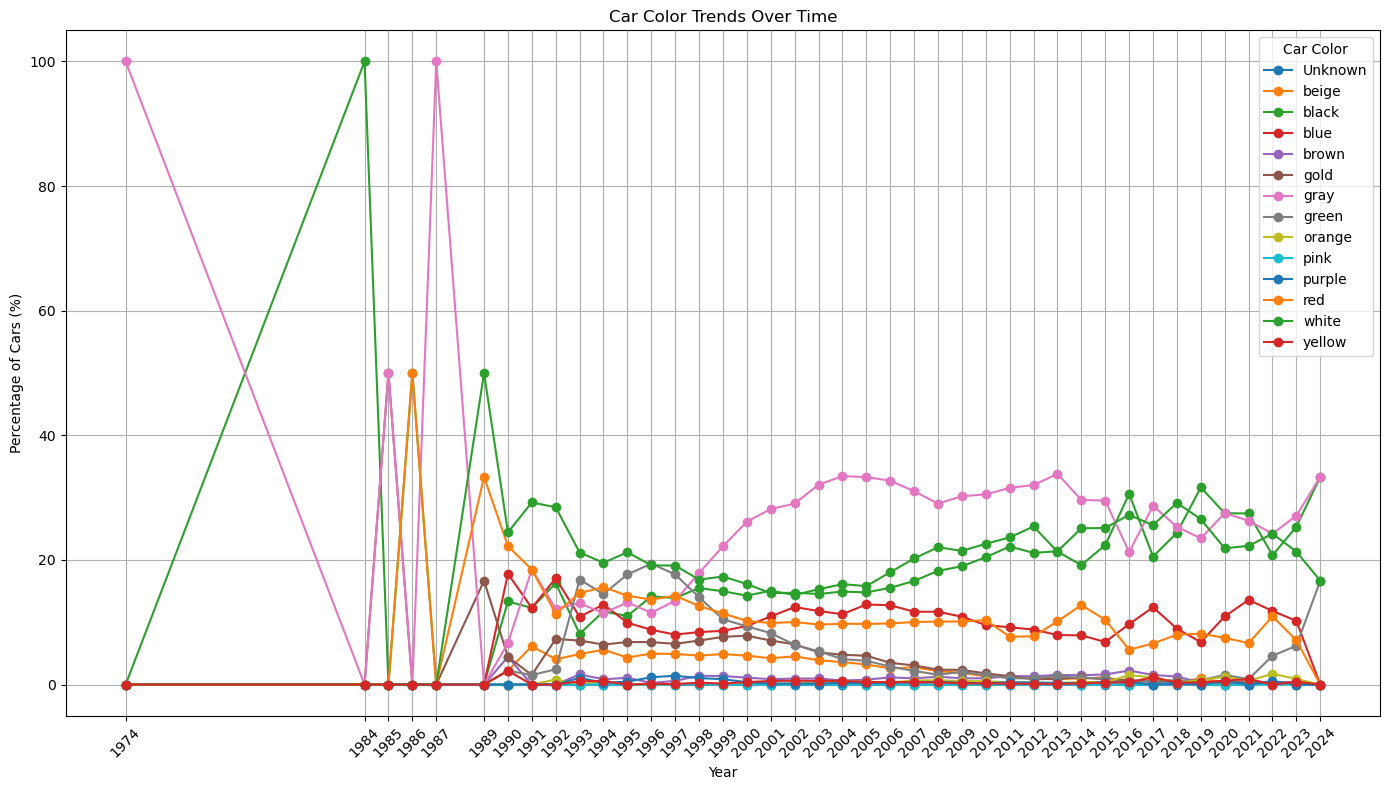

In [122]:
## Wonderful! Now on to the EDA proper.

## Color Evolution over Time

yearly_colors = df_cars.groupby(['year', 'color']).size().unstack(fill_value=0)
yearly_colors_percentage = yearly_colors.div(yearly_colors.sum(axis=1), axis=0) * 100

## Visualize the trend

plt.figure(figsize=(14, 8))
for color in [yearly_colors_percentage.columns]:
    plt.plot(yearly_colors_percentage.index, yearly_colors_percentage[color], marker='o', label=color)
plt.title('Car Color Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Cars (%)')
plt.xticks(yearly_colors_percentage.index, rotation=45)
plt.legend(title='Car Color')
plt.grid()
plt.tight_layout()
plt.show()


In [123]:
## I want to check the year distribution real quick...

df_cars['year'].value_counts().sort_index()


year
1974        1
1984        1
1985        2
1986        2
1987        1
1989        6
1990       45
1991       65
1992      123
1993      184
1994      360
1995      650
1996      765
1997     1347
1998     1917
1999     3006
2000     4513
2001     6414
2002     9543
2003    12739
2004    16374
2005    20090
2006    25174
2007    29177
2008    30663
2009    20093
2010    25382
2011    45931
2012    95032
2013    91976
2014    74264
2015     8979
2016      268
2017      259
2018      312
2019      296
2020      321
2021      346
2022      348
2023      226
2024        6
Name: count, dtype: int64

<Figure size 1600x800 with 0 Axes>

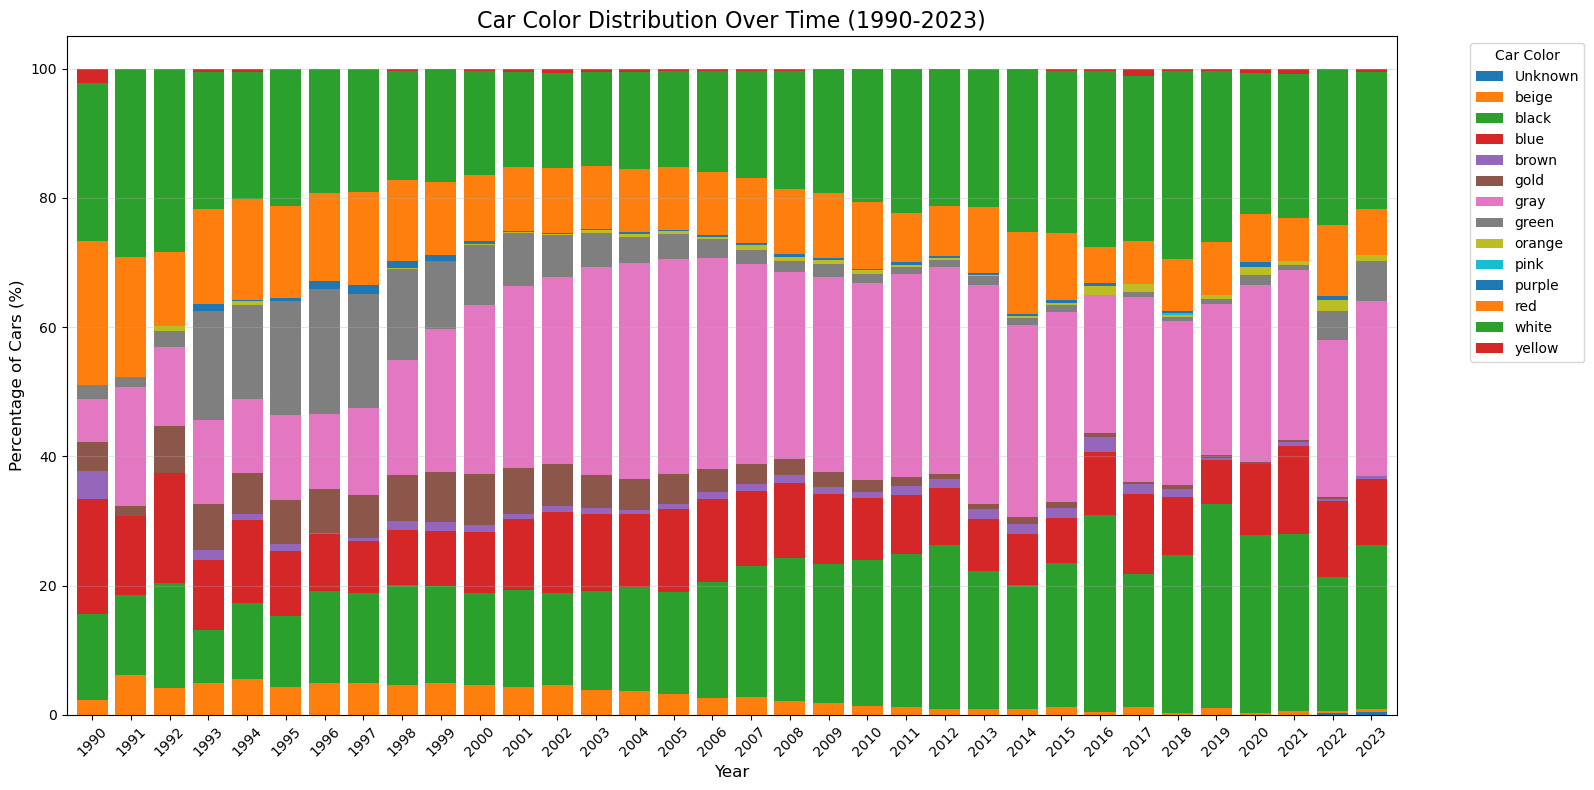

In [124]:
## There isn't enough data before the 90s or in 2024 to make a meaningful analysis, so we will focus on the 90s and onwards.
## I'm also not wild about that chart, so I'm going to create a stacked bar chart instead and see how that looks.

## Filter to 1990-2023

df_filtered = df_cars[(df_cars['year'] >= 1990) & (df_cars['year'] <= 2023)]

## Recalculate yearly colors percentage for the filtered data

yearly_colors = df_filtered.groupby(['year', 'color']).size().unstack(fill_value=0)
yearly_colors_percentage = yearly_colors.div(yearly_colors.sum(axis=1), axis=0) * 100

## Create stacked bar chart

plt.figure(figsize=(16, 8))
yearly_colors_percentage.plot(kind='bar', stacked=True, figsize=(16, 8), width=0.8)
plt.title('Car Color Distribution Over Time (1990-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Cars (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

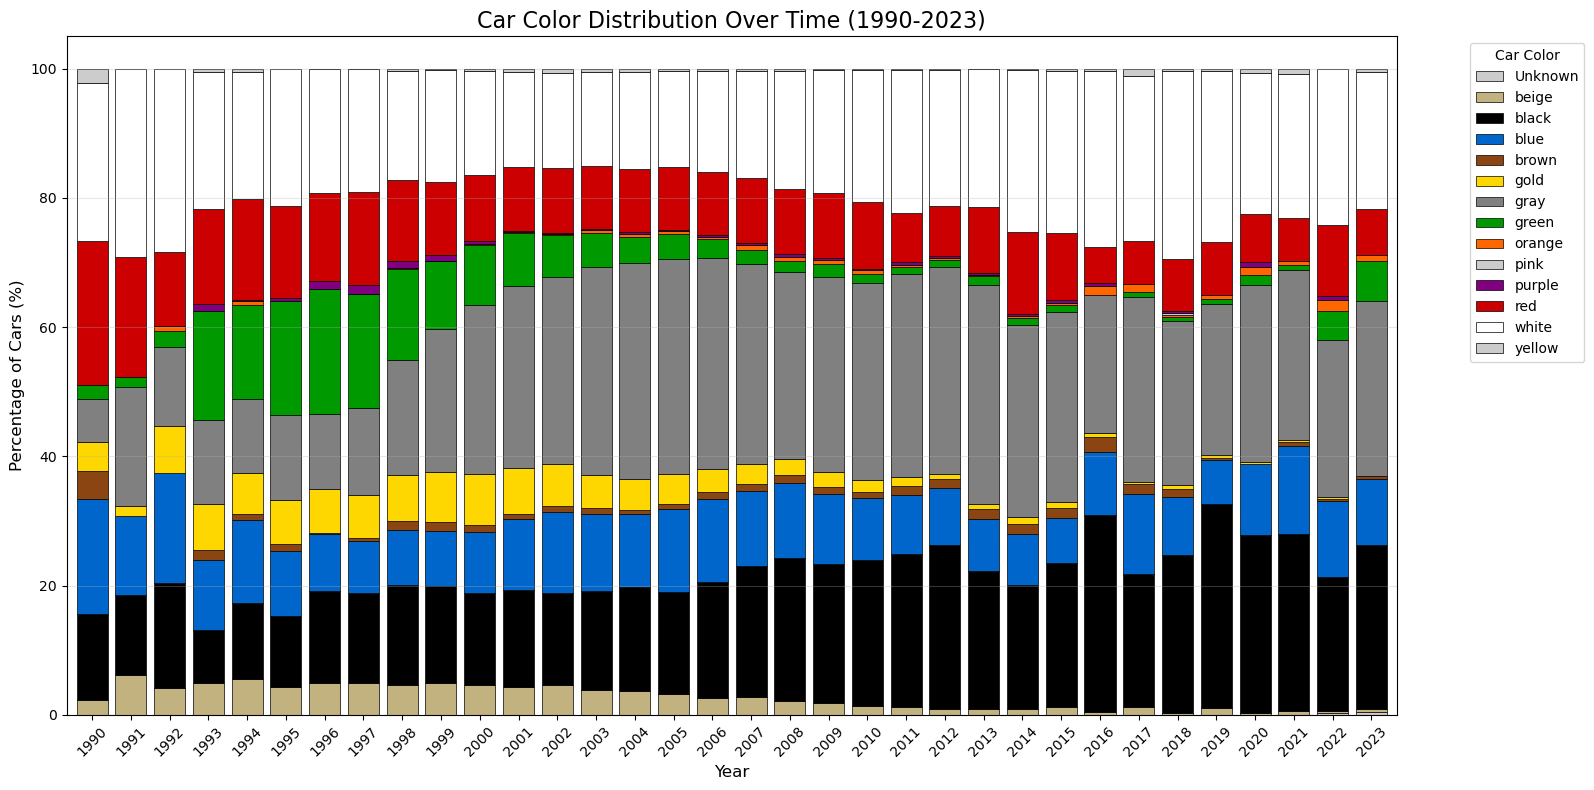

In [125]:
## Better, but I want to map the colors to the actual colors of the cars.

## Create color mapping dictionary
color_map = {
    'black': '#000000',
    'white': '#FFFFFF',
    'gray': '#808080',
    'blue': '#0066CC',
    'red': '#CC0000',
    'green': '#009900',
    'brown': '#8B4513',
    'beige': '#C2B280',
    'gold': '#FFD700',
    'orange': '#FF6600',
    'purple': '#800080'
}

## Get colors for the plot (only for colors that exist in data)
plot_colors = [color_map.get(col, '#CCCCCC') for col in yearly_colors_percentage.columns]

## Create stacked bar chart with actual colors
plt.figure(figsize=(16, 8))
yearly_colors_percentage.plot(kind='bar', stacked=True, figsize=(16, 8), color=plot_colors, width=0.8, edgecolor='black', linewidth=0.5)
plt.title('Car Color Distribution Over Time (1990-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Cars (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

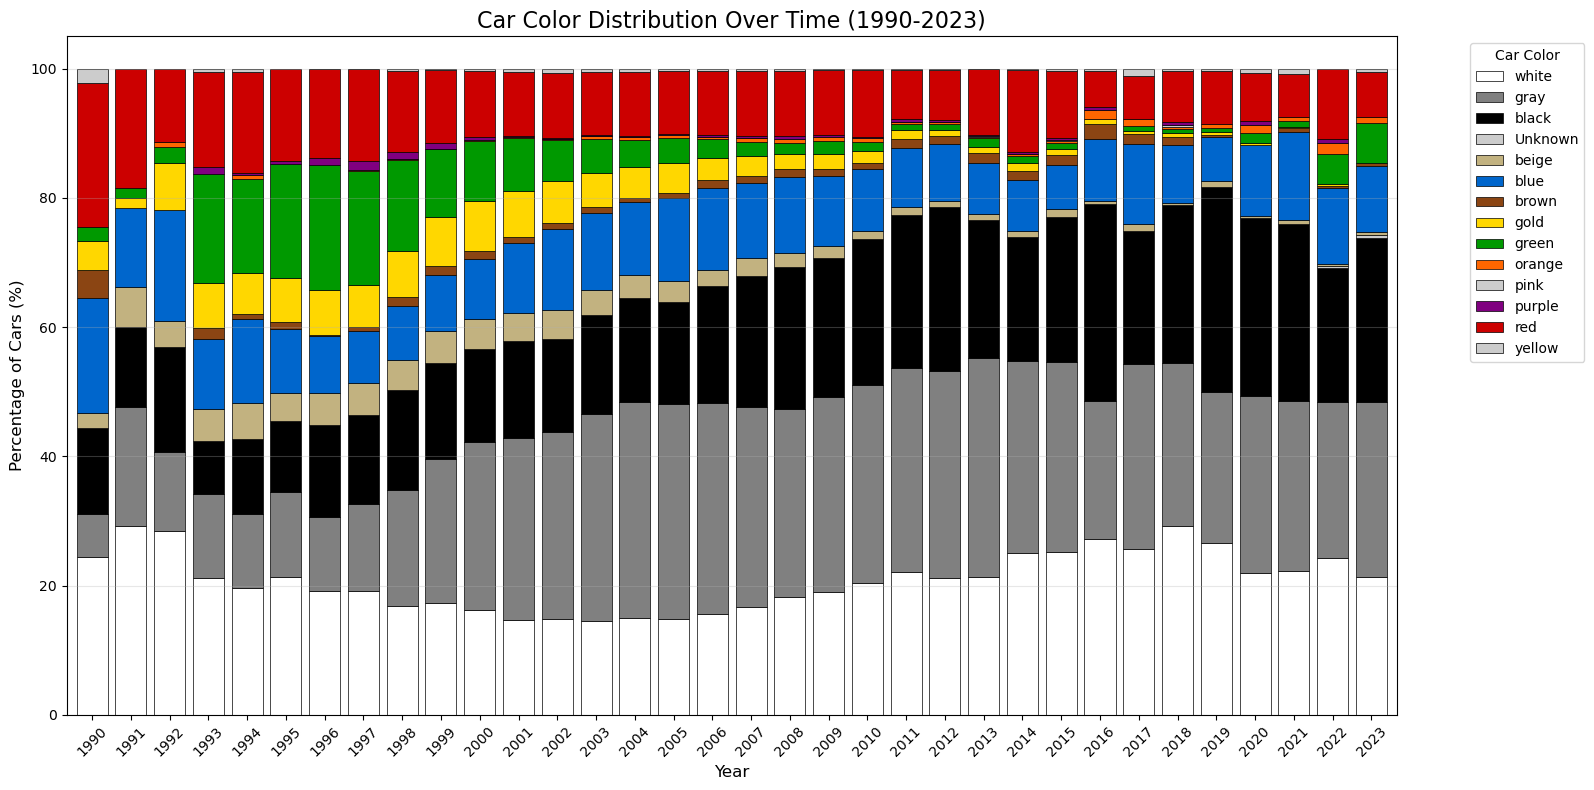

In [126]:
## Probably the last modification, but I want to reorder the columns so that monochrome colors (white, gray, black) are grouped together.

## Reorder columns to group monochrome colors together
monochrome_colors = ['white', 'gray', 'black']
other_colors = [col for col in yearly_colors_percentage.columns if col not in monochrome_colors]

## New column order: monochrome first, then others
column_order = monochrome_colors + sorted(other_colors)
yearly_colors_reordered = yearly_colors_percentage[column_order]

## Get colors for the plot in the new order
plot_colors = [color_map.get(col, '#CCCCCC') for col in column_order]

## Create stacked bar chart
plt.figure(figsize=(16, 8))
yearly_colors_reordered.plot(kind='bar', stacked=True, figsize=(16, 8), color=plot_colors, width=0.8, edgecolor='black', linewidth=0.5)
plt.title('Car Color Distribution Over Time (1990-2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of Cars (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Car Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [127]:
## Save the figure above

plt.savefig('/Users/samabrams/Data Analysis Projects/Car-Color-Trends-Project/04 Analysis/Visualizations/car_color_distribution_over_time_merged.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

## Color Evolution Analysis: Key Findings

### Research Question 1: When did monochrome dominance occur?

### The Great Monochrome Shift (1995-2000)

Analysis reveals a **dramatic transformation in the mid-1990s** where monochromatic colors (white, gray, black) surged from ~40% to 70%+ of the market within 5 years.

### Key Observations

- **Sharp transition around 1995-1997** - industry-wide shift, not gradual evolution
- **Gold cars virtually disappeared** after 2000 (most dramatic extinction)
- **Green cars nearly vanished** but show resurgence in 2020-2023
- **Blue and red maintained steady 5-10%** throughout the period
- **Market stabilized by 2005** and remained consistent through 2020

### Conclusion

The monochrome shift was a **discrete historical event (1995-2000)**, not an ongoing trend. Market has reached equilibrium with recent signs of potential diversification.

**Next**: Analyze which manufacturers led vs. followed this transition (Research Question 2).

---
## Brand Adaptation during Monochrome Shift

In [128]:
## First, value_counts of the 'brand' column to see the distribution of car brands

df_cars['make'].value_counts()


make
Ford             83767
Chevrolet        59469
Nissan           50710
Toyota           39076
Dodge            34751
Honda            26939
Hyundai          21515
BMW              20384
Kia              17867
Chrysler         16977
Mercedes-Benz    15583
Jeep             15215
Infiniti         14395
Lexus            11606
Volkswagen       11484
GMC              10569
Mazda             8301
Cadillac          7531
Acura             5887
Audi              5766
Buick             5059
Subaru            4996
Lincoln           4926
Pontiac           4462
Mitsubishi        4061
Volvo             3734
MINI              3188
Saturn            2827
Mercury           1952
Land Rover        1708
Scion             1648
Porsche           1570
Jaguar            1443
Suzuki            1068
FIAT               851
HUMMER             792
Saab               480
ford               438
smart              387
chevrolet          385
Oldsmobile         363
dodge              244
chrysler           209
Isuzu 

In [129]:
## Once I merged the datasets, I forgot to clean up the 'make' column. There are some weird entries in there that need to be fixed.
## I'm going to create a mapping dictionary to consolidate these entries.

## First, capitalize entries properly
capitalization_fixes = {
    'ford': 'Ford',
    'chevrolet': 'Chevrolet', 
    'bmw': 'BMW',
    'toyota': 'Toyota',
    'honda': 'Honda',
    'nissan': 'Nissan',
    'dodge': 'Dodge',
    'chrysler': 'Chrysler',
    'hyundai': 'Hyundai',
    'kia': 'Kia',
    'jeep': 'Jeep',
    'mazda': 'Mazda',
    'cadillac': 'Cadillac',
    'lexus': 'Lexus',
    'mitsubishi': 'Mitsubishi',
    'volkswagen': 'Volkswagen',
    'gmc': 'GMC',
    'acura': 'Acura',
    'audi': 'Audi',
    'buick': 'Buick',
    'subaru': 'Subaru',
    'lincoln': 'Lincoln',
    'pontiac': 'Pontiac',
    'mercury': 'Mercury',
    'porsche': 'Porsche',
    'oldsmobile': 'Oldsmobile',
    'plymouth': 'Plymouth',
    'suzuki': 'Suzuki',
    'maserati': 'Maserati',
    'smart': 'Smart'
}

## Implement capitalization fixes
df_cars['make'] = df_cars['make'].replace(capitalization_fixes)

## Check that worked
df_cars['make'].value_counts()


make
Ford             84205
Chevrolet        59854
Nissan           50779
Toyota           39171
Dodge            34995
Honda            27082
Hyundai          21534
BMW              20455
Kia              17874
Chrysler         17186
Mercedes-Benz    15583
Jeep             15325
Infiniti         14395
Lexus            11725
Volkswagen       11507
GMC              10592
Mazda             8446
Cadillac          7641
Acura             5911
Audi              5773
Buick             5073
Subaru            5055
Lincoln           4951
Pontiac           4489
Mitsubishi        4177
Volvo             3734
MINI              3188
Saturn            2827
Mercury           1983
Land Rover        1708
Scion             1648
Porsche           1589
Jaguar            1443
Suzuki            1073
FIAT               851
HUMMER             792
Saab               480
Smart              387
Oldsmobile         383
Isuzu              203
Maserati           166
Bentley            144
Land               129
land r

In [130]:
## Now for the other weird entries
brand_mapping = {
    # Mercedes variations
    'mercedes': 'Mercedes-Benz',
    'mercedes-b': 'Mercedes-Benz',
    
    # Volkswagen variations  
    'vw': 'Volkswagen',
    
    # Land Rover variations
    'land rover': 'Land Rover',
    'Land': 'Land Rover', 
    'landrover': 'Land Rover',
    
    # Truck variations
    'ford truck': 'Ford',
    'ford tk': 'Ford',
    'chev truck': 'Chevrolet',
    'dodge tk': 'Dodge', 
    'hyundai tk': 'Hyundai',
    'mazda tk': 'Mazda',
    'gmc truck': 'GMC',
    
    # Brand consolidations
    'INFINITI': 'Infiniti',
    'RAM': 'Ram',
    'HUMMER': 'Hummer',
    'Aston': 'Aston Martin',
    'Alfa': 'Alfa Romeo',
    
    # Mark as other/remove
    'dot': 'Other',
    'airstream': 'Other',
    'Geo': 'Other',
    'Daewoo': 'Other',
    'Karma': 'Other',
    'Isuzu': 'Other'
}

## Implement brand fixes
df_cars['make'] = df_cars['make'].replace(brand_mapping)

## Check that worked
df_cars['make'].value_counts()


make
Ford             84209
Chevrolet        59855
Nissan           50779
Toyota           39171
Dodge            34995
Honda            27082
Hyundai          21535
BMW              20455
Kia              17874
Chrysler         17186
Mercedes-Benz    15655
Jeep             15325
Infiniti         14454
Lexus            11725
Volkswagen       11521
GMC              10603
Mazda             8447
Cadillac          7641
Acura             5911
Audi              5773
Buick             5073
Subaru            5055
Lincoln           4951
Pontiac           4489
Mitsubishi        4177
Volvo             3734
MINI              3188
Saturn            2827
Land Rover        1993
Mercury           1983
Scion             1648
Porsche           1589
Jaguar            1443
Suzuki            1073
FIAT               851
Hummer             808
Saab               480
Smart              387
Oldsmobile         383
Other              229
Maserati           166
Bentley            144
Tesla              109
Aston 

In [131]:
## Now, I want to see which brands were doing the most business during those years where monochrome colors surged in popularity, 1996-2012.

## First, filter the DataFrame to include only the years 1996-2012
df_monochrome_period = df_cars[(df_cars['year'] >= 1996) & (df_cars['year'] <= 2012)]

## Next, group by 'make' and count occurrences
brand_counts = df_monochrome_period['make'].value_counts()

brand_counts


make
Ford             47520
Chevrolet        38211
Nissan           34460
Toyota           26359
Honda            23079
Dodge            19589
BMW              16407
Mercedes-Benz    11778
Jeep             10756
Hyundai          10704
Infiniti          9498
Chrysler          9250
Lexus             8834
Volkswagen        8141
GMC               8005
Kia               7267
Cadillac          6566
Mazda             5753
Acura             5350
Pontiac           4473
Audi              4421
Buick             3875
Lincoln           3373
Mitsubishi        2873
Saturn            2803
Volvo             2800
Subaru            2712
MINI              2542
Mercury           1948
Land Rover        1528
Jaguar            1267
Scion             1220
Porsche           1085
Suzuki            1020
Hummer             808
Saab               480
Oldsmobile         363
Smart              259
FIAT               233
Other              211
Maserati           112
Bentley            111
Aston Martin        28
Plymou

In [132]:
## Ford sold almost 1000 more cars than the next closest competitor, Chevrolet. 
## This represents total units, not market share, so I want to see what the market share looks like for these years.

## Calculate market share for each brand during 1996-2012
total_cars_monochrome_period = df_monochrome_period.shape[0]
brand_market_share = (brand_counts / total_cars_monochrome_period) * 100
brand_market_share


make
Ford             13.648897
Chevrolet        10.975126
Nissan            9.897748
Toyota            7.570944
Honda             6.628849
Dodge             5.626436
BMW               4.712489
Mercedes-Benz     3.382927
Jeep              3.089384
Hyundai           3.074449
Infiniti          2.728056
Chrysler          2.656824
Lexus             2.537339
Volkswagen        2.338293
GMC               2.299230
Kia               2.087259
Cadillac          1.885915
Mazda             1.652401
Acura             1.536650
Pontiac           1.284754
Audi              1.269818
Buick             1.112994
Lincoln           0.968807
Mitsubishi        0.825195
Saturn            0.805090
Volvo             0.804228
Subaru            0.778952
MINI              0.730124
Mercury           0.559513
Land Rover        0.438879
Jaguar            0.363913
Scion             0.350414
Porsche           0.311638
Suzuki            0.292969
Hummer            0.232077
Saab              0.137868
Oldsmobile        0.104

In [133]:
## I want to look at the amount of money spent on each brand now.

## First, ensure 'price' is numeric
df_cars['sellingprice'] = pd.to_numeric(df_cars['sellingprice'], errors='coerce')


In [134]:
## Now, I'm going to get some summary statistics for each brand so I can categorize them into 4 categories - luxury, premium, mainstream, budget.

brand_summary = df_cars.groupby('make').agg({
    'sellingprice': ['mean', 'median', 'std', 'count', 'min', 'max']
}).round(0)

brand_summary.columns = ['avg_price', 'median_price', 'price_std', 'volume', 'min_price', 'max_price']
brand_summary.reset_index(inplace=True)

brand_summary


,make,avg_price,median_price,price_std,volume,min_price,max_price
0,Acura,14137.0,14990.0,9181.0,5911,200,143900
1,Alfa Romeo,37686.0,34645.0,15830.0,19,20500,75900
2,Aston Martin,71094.0,51000.0,52298.0,33,32850,279950
3,Audi,20217.0,18100.0,15859.0,5773,150,187900
4,BMW,21236.0,20000.0,14607.0,20455,100,165000
5,Bentley,87097.0,64550.0,55105.0,144,22700,349950
6,Bugatti,1950995.0,1950995.0,NaN,1,1950995,1950995
7,Buick,10745.0,10600.0,8139.0,5073,100,42442
8,Cadillac,15424.0,14000.0,13743.0,7641,150,479995
9,Chevrolet,12049.0,10500.0,9229.0,59855,100,179000


In [135]:
## A few of these only have 1 or 2 entries, so I'm going to filter those out to concentrate on the top performers.

brands_filtered = brand_summary[brand_summary['volume'] >= 1000].copy()

print(f"Total brands in dataset: {len(brand_summary)}")
print(f"Brands with 1000+ vehicles: {len(brands_filtered)}")
print(f"Vehicles represented: {brands_filtered['volume'].sum()}")

brands_filtered.sort_values(by='volume', ascending=False)


Total brands in dataset: 58
Brands with 1000+ vehicles: 34
Vehicles represented: 523419


,make,avg_price,median_price,price_std,volume,min_price,max_price
15,Ford,14215.0,13100.0,8976.0,84209,1,429998
9,Chevrolet,12049.0,10500.0,9229.0,59855,100,179000
39,Nissan,11640.0,11900.0,5916.0,50779,100,149500
55,Toyota,12279.0,12000.0,7250.0,39171,150,91995
11,Dodge,13109.0,11500.0,9124.0,34995,100,489995
18,Honda,10910.0,11000.0,6732.0,27082,200,62000
20,Hyundai,11004.0,11300.0,5426.0,21535,100,55000
4,BMW,21236.0,20000.0,14607.0,20455,100,165000
24,Kia,11857.0,12100.0,5658.0,17874,150,50998
10,Chrysler,11045.0,10200.0,7128.0,17186,100,41000


In [136]:
## I'm starting to realize that price might not be the best way to categorize brands, considering that the bulk of the data is from auction sales, which tend to skew towards lower prices.
## I'm going to abandon this grouping task right now and focus instead on individual manufacturers for the moment.

## I want to get only my top 10 brands by volume, and use those for the diversity analysis.

top_brands = df_cars['make'].value_counts().nlargest(10).index.tolist()


In [137]:
## Calculate Shannon diversity index for color distribution

def shannon_diversity(color_counts):
    if len(color_counts) <= 1:
        return 0
    proportions = color_counts / color_counts.sum()
    return entropy(proportions, base=2)


In [138]:
## Create empty list to store results
diversity_results = []

## Loop through each year in our monochrome period and calculate diversity for each top brand
for year in range(1996, 2013):
    df_year = df_cars[df_cars['year'] == year]
    for brand in top_brands:
        df_brand = df_year[df_year['make'] == brand]
        color_counts = df_brand['color'].value_counts()
        diversity_score = shannon_diversity(color_counts)
        diversity_results.append({
            'year': year,
            'brand': brand,
            'diversity_score': diversity_score,
            'num_colors': len(color_counts)
        })

## Convert results to DataFrame
diversity_df = pd.DataFrame(diversity_results)
diversity_df.head(20)


,year,brand,diversity_score,num_colors
0,1996,Ford,2.703957,9
1,1996,Chevrolet,2.832120,9
2,1996,Nissan,2.885656,9
3,1996,Toyota,2.855521,8
4,1996,Dodge,2.499544,7
5,1996,Honda,2.642157,8
6,1996,Hyundai,0.000000,0
7,1996,BMW,2.259799,6
8,1996,Kia,0.000000,0
9,1996,Chrysler,1.625815,4


In [139]:
## I'm curious about those 0.00000 diversity scores from Kia and Hyundai. Let's dig into that.

diversity_df[diversity_df['diversity_score'] == 0.0]


,year,brand,diversity_score,num_colors
6,1996,Hyundai,0.0,0
8,1996,Kia,0.0,0
16,1997,Hyundai,0.0,0
18,1997,Kia,0.0,0
26,1998,Hyundai,0.0,0
28,1998,Kia,0.0,1
36,1999,Hyundai,0.0,1


In [140]:
## The zeroes make sense now. Kia and Hyundai only had one (or no) color listed for those years, so the diversity score is 0.
## I'm going to remove those zero entries from the diversity dataframe, as they aren't meaningful for this analysis.

## Remove the zero diversity entries
diversity_clean = diversity_df[diversity_df['diversity_score'] > 0].copy()

# See what data coverage we have for each brand
diversity_clean.groupby('brand')['year'].agg(['min', 'max', 'count'])


,min,max,count
brand,,,
BMW,1996,2012,17
Chevrolet,1996,2012,17
Chrysler,1996,2012,17
Dodge,1996,2012,17
Ford,1996,2012,17
Honda,1996,2012,17
Hyundai,2000,2012,13
Kia,1999,2012,14
Nissan,1996,2012,17


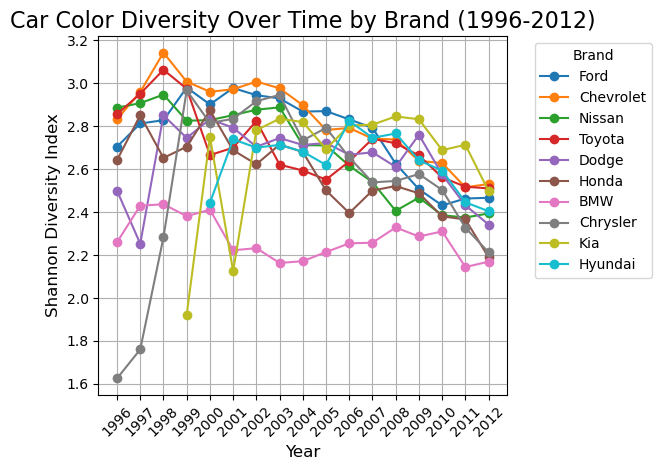

In [141]:
## Looking good. Now for the fun part - let's visualize the diversity scores over time for each brand.

for brand in diversity_clean['brand'].unique():
    brand_data = diversity_clean[diversity_clean['brand'] == brand].sort_values('year')
    plt.plot(brand_data['year'], brand_data['diversity_score'], marker='o', label=brand)

plt.title('Car Color Diversity Over Time by Brand (1996-2012)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Shannon Diversity Index', fontsize=12)
plt.xticks(range(1996, 2013), rotation=45)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


In [142]:
## This graph is a bit hectic, but it still shows the downward trend in color diversity during this period.

## Save the figure above
plt.savefig('/Users/samabrams/Data Analysis Projects/Car-Color-Trends-Project/04 Analysis/Visualizations/car_color_diversity_over_time_by_brand.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

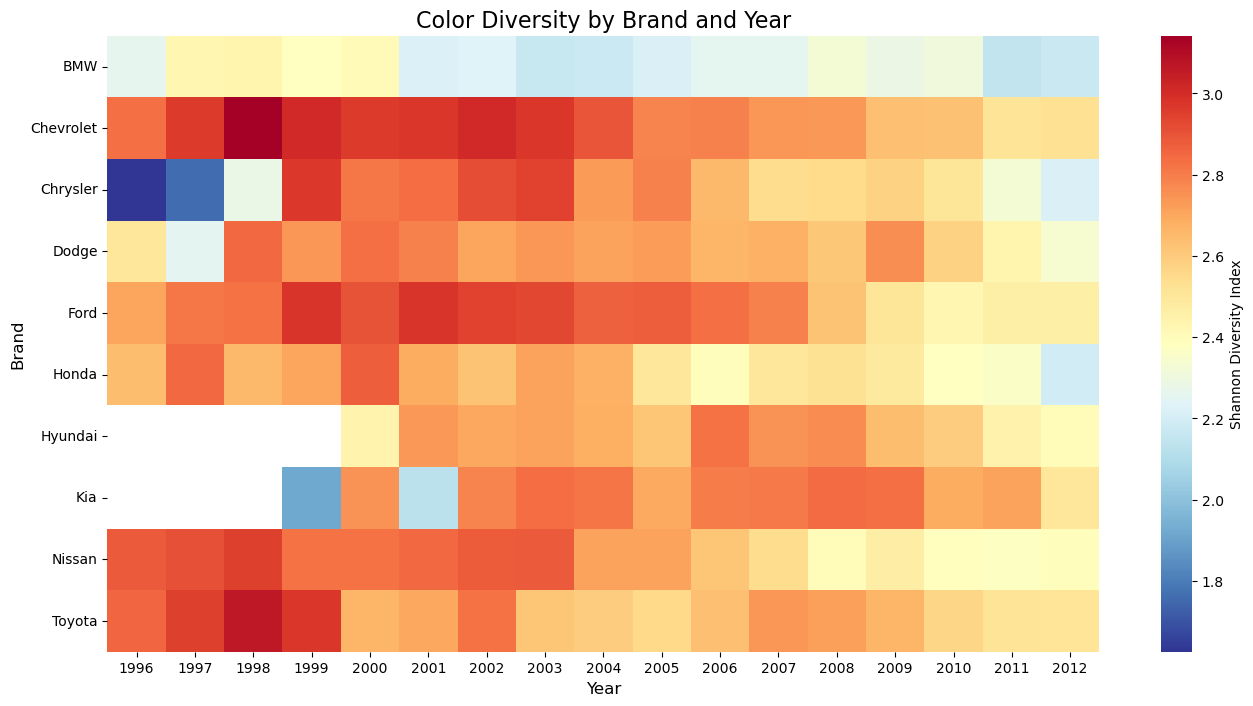

In [143]:
## I want to try a heatmap, just for funsies.

# Pivot the data for heatmap
diversity_pivot = diversity_clean.pivot(index='brand', columns='year', values='diversity_score')

plt.figure(figsize=(16, 8))
sns.heatmap(diversity_pivot, cmap='RdYlBu_r', cbar_kws={'label': 'Shannon Diversity Index'})
plt.title('Color Diversity by Brand and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.show()


In [144]:
## Arguably a better visualization of the same data. I like it. You can see the rise and fall of color diversity for each brand more clearly with the heatmap.

## Save it
plt.savefig('/Users/samabrams/Data Analysis Projects/Car-Color-Trends-Project/04 Analysis/Visualizations/car_color_diversity_heatmap_by_brand.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

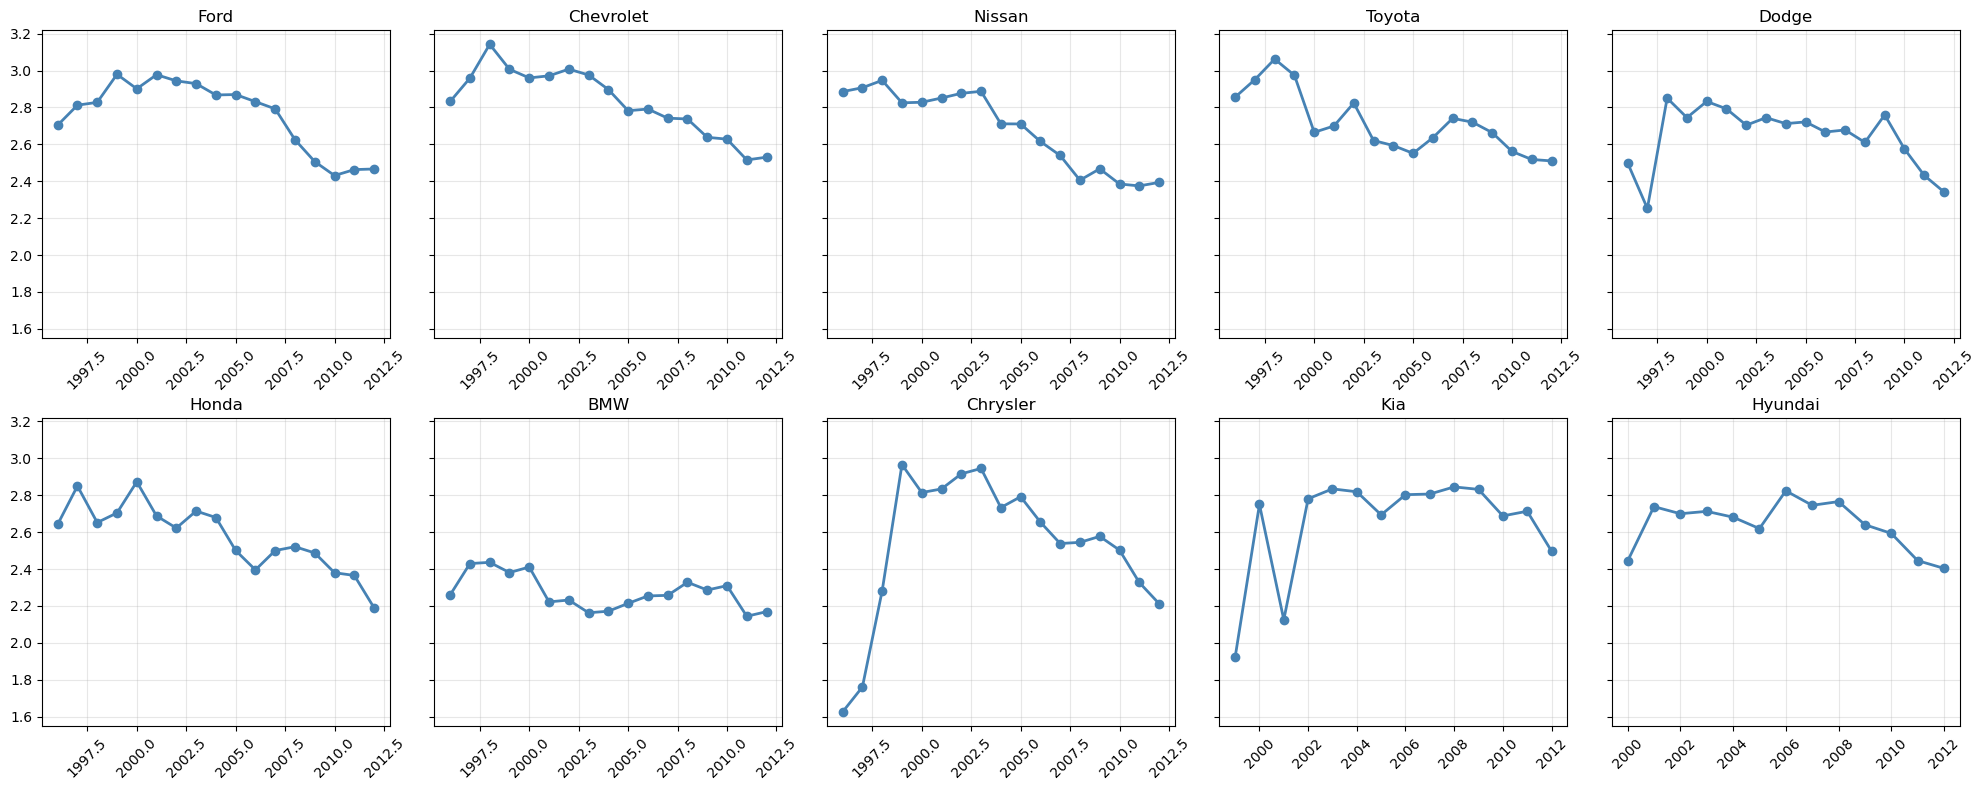

In [145]:
## line charts for each individual brand, but in a grid layout

fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharey=True)
axes = axes.flatten()

brands = diversity_clean['brand'].unique()
for i, brand in enumerate(brands):
    brand_data = diversity_clean[diversity_clean['brand'] == brand].sort_values('year')
    axes[i].plot(brand_data['year'], brand_data['diversity_score'], 
                 marker='o', linewidth=2, color='steelblue')
    axes[i].set_title(brand, fontsize=12)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [146]:
## Save figure
plt.savefig('/Users/samabrams/Data Analysis Projects/Car-Color-Trends-Project/04 Analysis/Visualizations/car_color_diversity_line_charts_by_brand.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [147]:
## I don't love the line charts.
## I don't think it necessarily adds anything that the heatmap doesn't already show, but it at least provides more insight into each particular brand.


In [148]:
## Finally, before moving on, I want to create a list of the most diverse brands for the entire monochrome period, 1996-2012.

## Calculate summary statistics for each brand
brand_summary = diversity_clean.groupby('brand').agg({
    'diversity_score': ['mean', 'min', 'max', 'std']
}).round(3)

## Create the table
brand_summary.columns = ['avg_diversity', 'min_diversity', 'max_diversity', 'volatility']
brand_summary = brand_summary.sort_values('avg_diversity', ascending=False)

brand_summary


,avg_diversity,min_diversity,max_diversity,volatility
brand,,,,
Chevrolet,2.830,2.515,3.142,0.181
Ford,2.760,2.431,2.979,0.191
Toyota,2.714,2.510,3.062,0.166
Nissan,2.683,2.375,2.947,0.213
Kia,2.651,1.922,2.845,0.284
Dodge,2.642,2.253,2.850,0.171
Hyundai,2.639,2.404,2.824,0.134
Honda,2.574,2.190,2.873,0.180
Chrysler,2.531,1.626,2.966,0.389


In [149]:
## Just for giggles, I want to see if there's any correlation between diversity and number of cars sold in that time period.

## Calculate total volume per brand from original data
brand_volume = df_cars.groupby('make').size().reset_index(name='total_volume')

## Calculate average diversity per brand from the diversity analysis
brand_diversity_avg = diversity_clean.groupby('brand').agg({
    'diversity_score': 'mean'
}).round(3).reset_index()

# Merge them together
volume_diversity = brand_diversity_avg.merge(brand_volume, left_on='brand', right_on='make', how='inner')

volume_diversity


,brand,diversity_score,make,total_volume
0,BMW,2.275,BMW,20455
1,Chevrolet,2.830,Chevrolet,59855
2,Chrysler,2.531,Chrysler,17186
3,Dodge,2.642,Dodge,34995
4,Ford,2.760,Ford,84209
5,Honda,2.574,Honda,27082
6,Hyundai,2.639,Hyundai,21535
7,Kia,2.651,Kia,17874
8,Nissan,2.683,Nissan,50779
9,Toyota,2.714,Toyota,39171


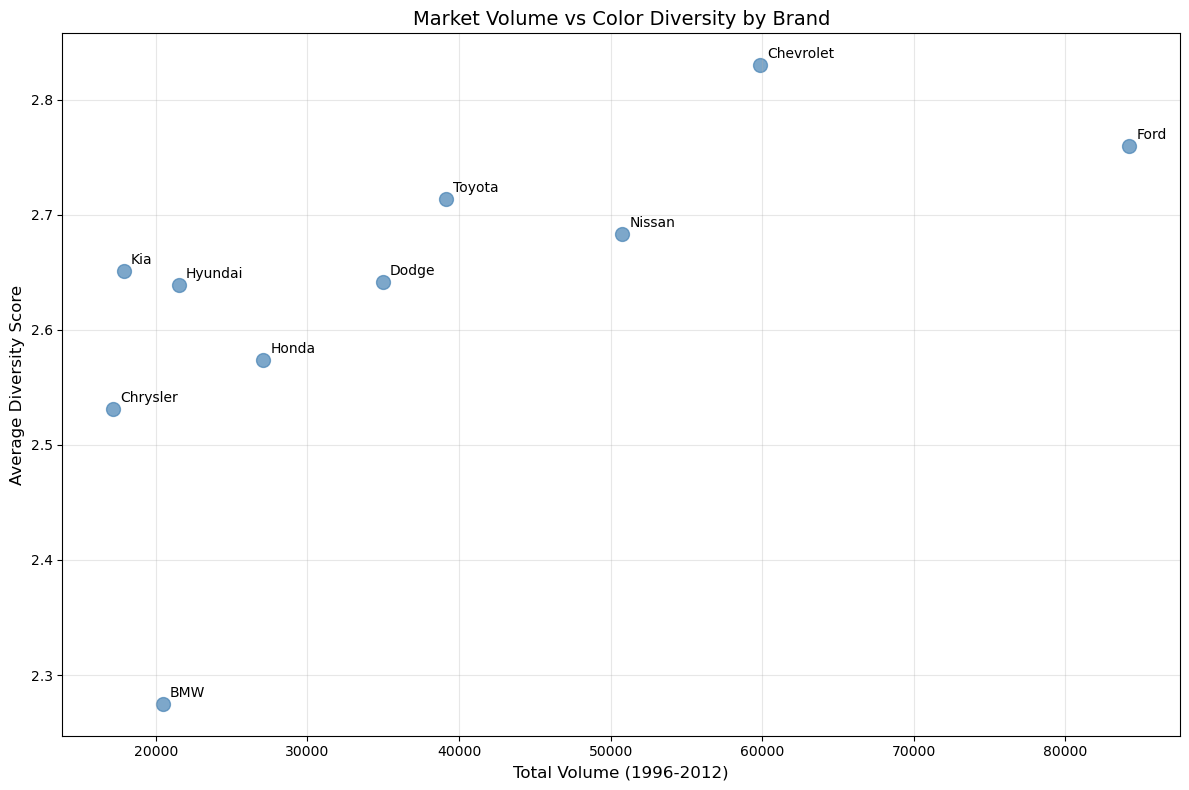

In [150]:
## Time for a scatter plot!

# Create scatter plot: Volume vs Average Diversity
plt.figure(figsize=(12, 8))
plt.scatter(volume_diversity['total_volume'], volume_diversity['diversity_score'], 
           s=100, alpha=0.7, color='steelblue')

# Add brand labels to each point
for i, row in volume_diversity.iterrows():
    plt.annotate(row['brand'], 
                (row['total_volume'], row['diversity_score']),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.xlabel('Total Volume (1996-2012)', fontsize=12)
plt.ylabel('Average Diversity Score', fontsize=12)
plt.title('Market Volume vs Color Diversity by Brand', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [151]:
## oooooh interesting! There does seem to be a slight positive correlation between volume and diversity, but further analysis would be needed to confirm that.

## Save figure anyway
plt.savefig('/Users/samabrams/Data Analysis Projects/Car-Color-Trends-Project/04 Analysis/Visualizations/car_color_diversity_vs_volume_by_brand.png', bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

### Color Diversity Analysis - Key Findings

The Shannon diversity analysis reveals clear temporal patterns in automotive color strategies from 1996-2012. The heatmap visualization shows that most brands maintained high color diversity (2.8-3.0+ diversity scores) in the late 1990s and early 2000s, indicated by the red coloring across the grid.

**Key observations:**
- **Universal decline**: All major brands show a transition from red (high diversity) to yellow/blue (lower diversity) as time progresses toward 2012
- **BMW consistently different**: Shows lower diversity scores (more blue) throughout the entire period compared to volume brands
- **Volume brands convergence**: Ford, Chevrolet, Toyota, and Honda follow similar patterns - starting with high diversity and gradually declining
- **Late 2000s shift**: The most dramatic color reduction appears to occur around 2008-2010 across multiple brands

The scatter plot analysis suggests a potential positive correlation between market volume and average diversity scores, with higher-volume brands like Chevrolet and Ford maintaining slightly higher diversity than lower-volume brands. However, this relationship warrants further investigation to determine statistical significance.

These findings directly support the hypothesis that automotive color diversity has systematically declined across the industry, with timing and magnitude varying by brand strategy.

---
## Early Adopters of the Monochrome Trend

In [ ]:
## To see who the pioneers of the monochrome movement were, I'm going to see when each manufacturer crossed the 50% monochrome threshold for the first time.
## This will give us a sense of which brands led the charge into the monochrome era, and who followed the trend.

## First, to define monochrome colors
monochrome_colors = ['white', 'gray', 'black']

## Now to calculate the percentage of monochrome colors for each brand by year
monochrome_trends = []

# I'm going to expand the year range a bit in case there are any trends outside the "monochrome shift" period.
for year in range(1990, 2023):
    year_data = df_cars[df_cars['year'] == year]
    for brand in top_brands:
        brand_data = year_data[year_data['make'] == brand]
        total_count = brand_data.shape[0]
        if len(brand_data) >= 100:
            monochrome_count = brand_data[brand_data['color'].isin(monochrome_colors)].shape[0]
            monochrome_percentage = (monochrome_count / total_count) * 100
            monochrome_trends.append({
                'year': year,
                'brand': brand,
                'monochrome_percentage': monochrome_percentage,
                'total_vehicles': total_count
            })

## Convert to DataFrame
monochrome_df = pd.DataFrame(monochrome_trends)
monochrome_df.head(20)


,year,brand,monochrome_percentage,total_vehicles
0,1995,Toyota,43.965517,116
1,1996,Toyota,36.842105,133
2,1997,Ford,41.422594,239
3,1997,Chevrolet,39.215686,102
4,1997,Nissan,55.882353,102
5,1997,Toyota,46.994536,183
6,1997,Honda,48.484848,198
7,1998,Ford,43.373494,249
8,1998,Chevrolet,35.000000,140
9,1998,Nissan,50.450450,111


In [ ]:
## BMW and Honda seem to be early adapters, now let's see when each brand first crossed the 50% threshold.

## Find first year each brand crossed 50% monochrome
tipping_points = []

for brand in monochrome_df['brand'].unique():
    brand_data = monochrome_df[monochrome_df['brand'] == brand].sort_values('year')
    crossed_50 = brand_data[brand_data['monochrome_percentage'] > 50]
    if not crossed_50.empty:
        first_year = crossed_50.iloc[0]['year']
        tipping_points.append({
            'brand': brand,
            'first_year_over_50%': first_year,
            'monochrome percentage': crossed_50.iloc[0]['monochrome_percentage'],
            'sample size': crossed_50.iloc[0]['total_vehicles']
        })

## Convert to DataFrame
tipping_points_df = pd.DataFrame(tipping_points)
tipping_points_df = tipping_points_df.sort_values('first_year_over_50%')

tipping_points_df


,brand,first_year_over_50%,monochrome percentage,sample size
3,Nissan,1997,55.882353,102
4,Honda,1998,52.857143,280
0,Toyota,1999,52.753623,345
2,Chevrolet,1999,50.965251,259
5,BMW,1999,68.867925,106
7,Hyundai,2001,59.223301,103
1,Ford,2002,54.633472,1446
6,Dodge,2003,56.346154,520
8,Chrysler,2004,57.380952,420
9,Kia,2004,57.142857,245


### Early Adopters vs. Followers - Key Findings

**Early Adopters (1997-1999):**
- **Nissan led the trend** - first to cross 50% monochrome in 1997 (55.9%)
- **Japanese brands dominated early adoption** - Honda (1998) and Toyota (1999) followed quickly
- **Chevrolet** was the only American brand to adopt early (1999, 50.9%)
- **BMW showed the most aggressive shift** - 68.9% monochrome by 1999, highest among early adopters

**Late Adopters (2001-2004):**
- **American brands lagged significantly** - Ford didn't cross until 2002, despite being a volume leader
- **Chrysler group brands were latest** - Dodge (2003) and Chrysler (2004) were among the last to shift
- **Korean brands followed American timeline** - Hyundai (2001) and Kia (2004)

**Timeline Insights:**
- The shift to monochrome happened fast: all top 10 brands by volume tipped 50% over just 7 years (1997-2004)
- Japanese automakers led the industry shift, potentially setting the trend that others followed
- Volume leadership didn't correlate with trend leadership - Ford was late despite high market share
- All sample sizes exceeded 100 vehicles, to ensure statistical reliability

In [ ]:
## Before I move on, I want to expand to the top 35 brands by volume from earlier, and see if any of them crossed the 50% threshold significantly earlier or later.

# Get all brands with 1000+ total vehicles
high_volume_brands = df_cars['make'].value_counts()[df_cars['make'].value_counts() >= 1000].index

high_volume_brands.tolist()


['Ford',
 'Chevrolet',
 'Nissan',
 'Toyota',
 'Dodge',
 'Honda',
 'Hyundai',
 'BMW',
 'Kia',
 'Chrysler',
 'Mercedes-Benz',
 'Jeep',
 'Infiniti',
 'Lexus',
 'Volkswagen',
 'GMC',
 'Mazda',
 'Cadillac',
 'Acura',
 'Audi',
 'Buick',
 'Subaru',
 'Lincoln',
 'Pontiac',
 'Mitsubishi',
 'Volvo',
 'MINI',
 'Saturn',
 'Land Rover',
 'Mercury',
 'Scion',
 'Porsche',
 'Jaguar',
 'Suzuki']

In [ ]:
# Recalculate monochrome percentages for ALL high-volume brands
monochrome_results_all = []

for year in range(1996, 2013):
    year_data = df_cars[df_cars['year'] == year]
    
    for brand in high_volume_brands:
        brand_data = year_data[year_data['make'] == brand]
        
        if len(brand_data) >= 100:
            monochrome_count = brand_data['color'].isin(monochrome_colors).sum()
            total_count = len(brand_data)
            monochrome_pct = (monochrome_count / total_count) * 100
            
            monochrome_results_all.append({
                'year': year,
                'brand': brand,
                'monochrome_percentage': monochrome_pct,
                'total_vehicles': total_count
            })

monochrome_df_all = pd.DataFrame(monochrome_results_all)

# Find tipping points for all brands
tipping_points_all = []

for brand in monochrome_df_all['brand'].unique():
    brand_data = monochrome_df_all[monochrome_df_all['brand'] == brand].sort_values('year')
    crossed_50 = brand_data[brand_data['monochrome_percentage'] > 50]
    
    if not crossed_50.empty:
        first_year = crossed_50.iloc[0]['year']
        tipping_points_all.append({
            'brand': brand,
            'first_year_over_50%': first_year,
            'monochrome_percentage': crossed_50.iloc[0]['monochrome_percentage'],
            'sample_size': crossed_50.iloc[0]['total_vehicles']
        })

tipping_points_df_all = pd.DataFrame(tipping_points_all).sort_values('first_year_over_50%')
tipping_points_df_all


,brand,first_year_over_50%,monochrome_percentage,sample_size
3,Nissan,1997,55.882353,102
4,Honda,1998,52.857143,280
0,Toyota,1999,52.753623,345
2,Chevrolet,1999,50.965251,259
5,BMW,1999,68.867925,106
6,Mercedes-Benz,1999,64.356436,101
7,Lexus,1999,66.666667,183
10,Cadillac,2000,69.026549,113
11,Buick,2000,51.456311,103
12,Pontiac,2000,54.545455,110


In [ ]:
## Nothing earth-shattering, it is interesting to note, though, that when the "luxury" brands tip, they tip hard - BMW at 68%, Mercedes-Benz at 64%, and Lexus at 62%.


---
## Luxury vs. Economy Brand Analysis

In [ ]:
## First, I need to define what "luxury" brands are. I'm going to find the average selling price for each brand, and hopefully use that as a proxy for luxury status.

## Calculate average selling price for each brand
brand_prices = df_cars.groupby('make')['sellingprice'].mean().sort_values(ascending=False).round(0)
brand_prices


make
Bugatti          1950995.0
Lamborghini       250780.0
Rolls-Royce       222509.0
McLaren           213458.0
Ferrari           176086.0
Lucid             101966.0
Rivian             93138.0
Bentley            87097.0
Aston Martin       71094.0
Maybach            64250.0
Maserati           62748.0
Tesla              52326.0
Lotus              52010.0
Fisker             46461.0
Porsche            45891.0
Genesis            43280.0
Alfa Romeo         37686.0
Polestar           35999.0
Land Rover         32761.0
Mercedes-Benz      21265.0
BMW                21236.0
Lexus              20306.0
Infiniti           20217.0
Audi               20217.0
Jaguar             20005.0
GMC                17078.0
Lincoln            15757.0
Cadillac           15424.0
Subaru             15317.0
Hummer             15294.0
Jeep               15054.0
Ford               14215.0
Acura              14137.0
Dodge              13109.0
Toyota             12279.0
MINI               12236.0
Chevrolet          1204

In [ ]:
## I'm going to create a tiered classification system based on average price.
## I should mention that this is a very rough classification, and there are many exceptions to these rules, for the reasons mentioned earlier about auction data skewing prices lower.
## Alas, the tiered system based on this dataset is as follows:

# Create tier classification based on average price breakpoints
def classify_by_price(avg_price):
    if avg_price >= 20000:
        return 'Luxury'
    elif avg_price >= 10000:
        return 'Mainstream'
    else:
        return 'Budget'
    
## Apply classification to tipping points dataframe
tipping_points_df_all['brand_class'] = tipping_points_df_all['brand'].map(brand_prices).apply(classify_by_price)

tipping_points_df_all = tipping_points_df_all.sort_values('first_year_over_50%')
tipping_points_df_all


,brand,first_year_over_50%,monochrome_percentage,sample_size,brand_class
3,Nissan,1997,55.882353,102,Mainstream
4,Honda,1998,52.857143,280,Mainstream
0,Toyota,1999,52.753623,345,Mainstream
2,Chevrolet,1999,50.965251,259,Mainstream
5,BMW,1999,68.867925,106,Luxury
6,Mercedes-Benz,1999,64.356436,101,Luxury
7,Lexus,1999,66.666667,183,Luxury
10,Cadillac,2000,69.026549,113,Mainstream
11,Buick,2000,51.456311,103,Mainstream
12,Pontiac,2000,54.545455,110,Budget


In [ ]:
# Calculate average adoption year by tier
tier_adoption = tipping_points_df_all.groupby('brand_class')['first_year_over_50%'].agg(['mean', 'min', 'max', 'count']).round(1)
tier_adoption.columns = ['avg_adoption_year', 'earliest', 'latest', 'num_brands']

tier_adoption


,avg_adoption_year,earliest,latest,num_brands
brand_class,,,,
Budget,2002.9,2000,2007,7
Luxury,2002.2,1999,2008,8
Mainstream,2001.6,1997,2010,19


In [ ]:

# Show which specific brands are in each tier
for tier in ['Luxury', 'Mainstream', 'Budget']:
    tier_brands = tipping_points_df_all[tipping_points_df_all['brand_class'] == tier].sort_values('first_year_over_50%')
    if not tier_brands.empty:
        print(f"\n{tier.upper()} BRANDS:")
        print(tier_brands[['brand', 'first_year_over_50%', 'monochrome_percentage']].to_string(index=False))



LUXURY BRANDS:
        brand  first_year_over_50%  monochrome_percentage
          BMW                 1999              68.867925
Mercedes-Benz                 1999              64.356436
        Lexus                 1999              66.666667
         Audi                 2001              65.789474
       Jaguar                 2003              61.864407
     Infiniti                 2003              74.825175
      Porsche                 2006              71.544715
   Land Rover                 2008              86.024845

MAINSTREAM BRANDS:
    brand  first_year_over_50%  monochrome_percentage
   Nissan                 1997              55.882353
    Honda                 1998              52.857143
   Toyota                 1999              52.753623
Chevrolet                 1999              50.965251
 Cadillac                 2000              69.026549
    Buick                 2000              51.456311
    Acura                 2001              63.200000
  Hyundai 

## 2C: Luxury vs Economy Brand Analysis - Key Findings

The tier-based analysis reveals **no significant difference** in monochrome adoption timing across price segments:

- **Budget brands**: 2002.9 average adoption year
- **Luxury brands**: 2002.2 average adoption year  
- **Mainstream brands**: 2001.6 average adoption year

**Key insight:** Brand "class" had minimal impact on color strategy timing (1.3-year spread). The monochrome shift was an industry-wide phenomenon driven by factors beyond luxury/economy positioning, with individual brand decisions mattering more than market tier.